Support Vector Machine is a supervied machine learning algorithm that can be used to predict polarity of reviews in amazon fine foods dataset obtained from kaggle. (https://www.kaggle.com/snap/amazon-fine-food-reviews)

In this ipython notebook,following steps are performed:
    1. Load cleaned data 
    2. Sample data
    3. Convert text to vector using one of the following methods
        a.bag of words
        b.tf-idf
        c.average word2vec
        d.tf-idf word2vec
    4. Apply SVC
        a. column standardize data
        b. divide data into test and train
        c. find the best alpha and gamma using
             i.grid search cross validation
             ii.random search cross validation
        d. Predict the polarity of test samples using logistic regression
    5. Performance measurement
        a. accuracy
        b. confusion matrix
        c. presicion, recall and f1-score

1. Load cleaned Data

In [1]:
%matplotlib inline

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 


#Using sqlite3 to retrieve data from sqlite file
con = sqlite3.connect(r'C:\Users\Admin\Downloads\final.sqlite')

#Read data from the sqlite file
data = pd.read_sql_query("""
SELECT * FROM Reviews 
""",con)


2.Randomly sample data

In [2]:
data.sort_values('Time',inplace=True,ascending=False)
sampled_data=data[:12000]

In [3]:
#We use 70% of data for training and 30% of data for test
import math
sampled_data.sort_values('Time',inplace=True,ascending=True) 

X_train =  sampled_data[:math.ceil(len(sampled_data)*.7)] 
X_test = sampled_data[math.ceil(len(sampled_data)*.3):]
y_train = sampled_data['Score'][:math.ceil(len(sampled_data)*.7)]
y_test =  sampled_data['Score'][math.ceil(len(sampled_data)*.3):]

3.Convert to vector

Bag of Words

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer() 
bow_model = count_vect.fit(X_train['CleanedText'])
final_bow_train = bow_model.transform(X_train['CleanedText'])
final_bow_test = bow_model.transform(X_test['CleanedText'])

Normalise data

In [5]:
from sklearn.preprocessing import StandardScaler

normalised_bow_train = StandardScaler(with_mean=False).fit_transform(final_bow_train)
normalised_bow_test = StandardScaler(with_mean=False).fit_transform(final_bow_test)

In [6]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

Find optimal alpha and gamma

Grid Search

In [7]:
svc = SVC(kernel='rbf')
paramgrid = {'gamma':[1,0.1,0.01,0.001,0.0001],
             'C':[1,0.1,0.01,0.001,0.0001]}

grid = GridSearchCV(estimator = svc,param_grid=paramgrid ,cv = 4,n_jobs = 3)
grid.fit(normalised_bow_train, y_train)
optimal_alpha = grid.best_params_
print("best alpha = ", optimal_alpha)

best alpha =  {'C': 1, 'gamma': 0.0001}


Predict using RBF Kernel

In [8]:
classifier = SVC(C=optimal_alpha.get('C'),gamma=optimal_alpha.get('gamma'),kernel='rbf')
classifier.fit(normalised_bow_train,y_train)
predicted = classifier.predict(normalised_bow_test)


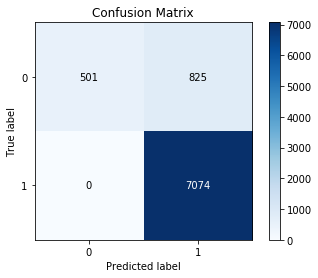

In [9]:
import scikitplot.metrics as skplt
skplt.plot_confusion_matrix(y_test ,predicted)

In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

In [11]:
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, predicted)*100))
print("Precision on test set: %0.3f"%(precision_score(y_test, predicted)))
print("Recall on test set: %0.3f"%(recall_score(y_test, predicted)))
print("F1-Score on test set: %0.3f"%(f1_score(y_test, predicted)))

Accuracy on test set: 90.179%
Precision on test set: 0.896
Recall on test set: 1.000
F1-Score on test set: 0.945


Random Search to find optimal hyperparameters

In [12]:
rand = RandomizedSearchCV(estimator = svc,param_distributions=paramgrid ,cv = 4,n_jobs = 3)
rand.fit(normalised_bow_train, y_train)
optimal_alpha = rand.best_params_
print("best alpha = ", optimal_alpha)

best alpha =  {'gamma': 0.001, 'C': 1}


In [13]:
classifier = SVC(C=optimal_alpha.get('C'),gamma=optimal_alpha.get('gamma'),kernel='rbf')
classifier.fit(normalised_bow_train,y_train)
predicted = classifier.predict(normalised_bow_test)

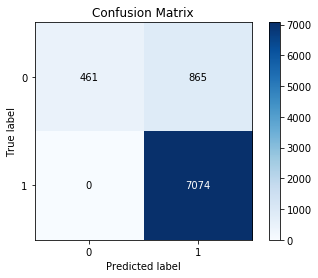

In [14]:
skplt.plot_confusion_matrix(y_test ,predicted)

In [15]:
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, predicted)*100))
print("Precision on test set: %0.3f"%(precision_score(y_test, predicted)))
print("Recall on test set: %0.3f"%(recall_score(y_test, predicted)))
print("F1-Score on test set: %0.3f"%(f1_score(y_test, predicted)))

Accuracy on test set: 89.702%
Precision on test set: 0.891
Recall on test set: 1.000
F1-Score on test set: 0.942


TF-IDF 

In [16]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf_vec = TfidfVectorizer()
tfidf_model = tf_idf_vec.fit(X_train['CleanedText'])
final_tfidf_train = tfidf_model.transform(X_train['CleanedText'])
final_tfidf_test = tfidf_model.transform(X_test['CleanedText'])

In [17]:
normalised_tfidf_train = StandardScaler(with_mean=False).fit_transform(final_tfidf_train)
normalised_tfidf_test = StandardScaler(with_mean=False).fit_transform(final_tfidf_test)

In [18]:
svc = SVC(kernel='rbf')
paramgrid = {'gamma':[1,0.1,0.01,0.001,0.0001],
             'C':[1,0.1,0.01,0.001,0.0001]}

grid = GridSearchCV(estimator = svc,param_grid=paramgrid ,cv = 4,n_jobs = 3)
grid.fit(normalised_tfidf_train, y_train)
optimal_alpha = grid.best_params_
print("best alpha = ", optimal_alpha)

best alpha =  {'C': 1, 'gamma': 0.0001}


In [19]:
classifier = SVC(C=optimal_alpha.get('C'),gamma=optimal_alpha.get('gamma'),kernel='rbf')
classifier.fit(normalised_tfidf_train,y_train)
predicted = classifier.predict(normalised_tfidf_test)

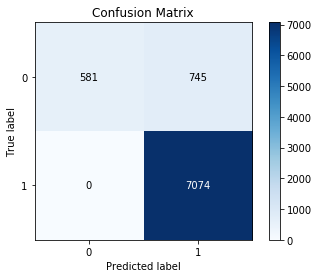

In [20]:
skplt.plot_confusion_matrix(y_test ,predicted)

In [21]:
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, predicted)*100))
print("Precision on test set: %0.3f"%(precision_score(y_test, predicted)))
print("Recall on test set: %0.3f"%(recall_score(y_test, predicted)))
print("F1-Score on test set: %0.3f"%(f1_score(y_test, predicted)))

Accuracy on test set: 91.131%
Precision on test set: 0.905
Recall on test set: 1.000
F1-Score on test set: 0.950


In [22]:
rand = RandomizedSearchCV(estimator = svc,param_distributions=paramgrid ,cv = 4,n_jobs = 3)
rand.fit(normalised_tfidf_train, y_train)
optimal_alpha = rand.best_params_
print("best alpha = ", optimal_alpha)

best alpha =  {'gamma': 0.001, 'C': 0.01}


In [23]:
classifier = SVC(C=optimal_alpha.get('C'),gamma=optimal_alpha.get('gamma'),kernel='rbf')
classifier.fit(normalised_tfidf_train,y_train)
predicted = classifier.predict(normalised_tfidf_test)

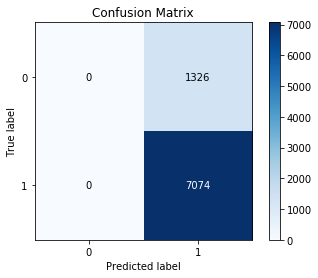

In [24]:
skplt.plot_confusion_matrix(y_test ,predicted)

In [25]:
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, predicted)*100))
print("Precision on test set: %0.3f"%(precision_score(y_test, predicted)))
print("Recall on test set: %0.3f"%(recall_score(y_test, predicted)))
print("F1-Score on test set: %0.3f"%(f1_score(y_test, predicted)))

Accuracy on test set: 84.214%
Precision on test set: 0.842
Recall on test set: 1.000
F1-Score on test set: 0.914


Average word2vec

In [26]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle
import gensim

In [27]:
import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
import nltk
from nltk.corpus import stopwords

stop = set(stopwords.words('english')) #set of stopwords
def cleanhtml(sentence): #function to clean the word of any html-tags
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext
def cleanpunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned

In [28]:
i=0
str1=''
list_of_sent_train=[]
final_string_for_tfidf_train = []
for sent in X_train['Text'].values:
    filtered_sentence=[]
    sent=cleanhtml(sent)
    str1 = ''
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if((cleaned_words.isalpha()) & (cleaned_words.lower() not in stop)):    
                filtered_sentence.append(cleaned_words.lower())
                str1 += " "+cleaned_words.lower() 
            else:
                continue
  
    list_of_sent_train.append(filtered_sentence)
    final_string_for_tfidf_train.append((str1).strip())

In [29]:
i=0
str1=''
list_of_sent=[]
final_string_for_tfidf = []
for sent in sampled_data['Text'].values:
    filtered_sentence=[]
    sent=cleanhtml(sent)
    str1 = ''
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if((cleaned_words.isalpha()) & (cleaned_words.lower() not in stop)):    
                filtered_sentence.append(cleaned_words.lower())
                str1 += " "+cleaned_words.lower() 
            else:
                continue
  
    list_of_sent.append(filtered_sentence)
    final_string_for_tfidf.append((str1).strip())

In [30]:
w2v_model=gensim.models.Word2Vec(list_of_sent_train,min_count=5,size=50, workers=2)

In [31]:
sent_vectors = []; 
for sent in list_of_sent: 
    sent_vec = np.zeros(50)
    cnt_words =0; 
    for word in sent: 
        try:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors.append(sent_vec)

In [32]:
X_train = sent_vectors[:math.ceil(len(sampled_data)*.7)]  #final_w2v_count
X_test = sent_vectors[math.ceil(len(sampled_data)*.3):] #final_w2v_count

In [33]:
X_train=np.nan_to_num(X_train)
X_test=np.nan_to_num(X_test)

In [34]:
normalised_w2v_train = StandardScaler(with_mean=False).fit_transform(X_train)
normalised_w2v_test = StandardScaler(with_mean=False).fit_transform(X_test)

In [35]:
svc = SVC(kernel='rbf')
paramgrid = {'gamma':[1,0.1,0.01,0.001,0.0001],
             'C':[1,0.1,0.01,0.001,0.0001]}

grid = GridSearchCV(estimator = svc,param_grid=paramgrid ,cv = 4,n_jobs = 3)
grid.fit(normalised_w2v_train, y_train)
optimal_alpha = grid.best_params_
print("best alpha = ", optimal_alpha)

best alpha =  {'C': 1, 'gamma': 0.1}


In [36]:
classifier = SVC(C=optimal_alpha.get('C'),gamma=optimal_alpha.get('gamma'),kernel='rbf')
classifier.fit(normalised_w2v_train,y_train)
predicted = classifier.predict(normalised_w2v_test)

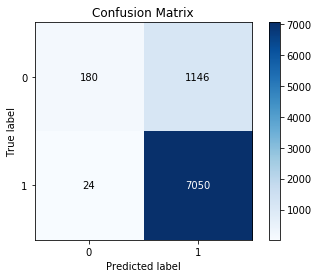

In [37]:
skplt.plot_confusion_matrix(y_test ,predicted)

In [38]:
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, predicted)*100))
print("Precision on test set: %0.3f"%(precision_score(y_test, predicted)))
print("Recall on test set: %0.3f"%(recall_score(y_test, predicted)))
print("F1-Score on test set: %0.3f"%(f1_score(y_test, predicted)))

Accuracy on test set: 86.071%
Precision on test set: 0.860
Recall on test set: 0.997
F1-Score on test set: 0.923


In [39]:
rand = RandomizedSearchCV(estimator = svc,param_distributions=paramgrid ,cv = 4,n_jobs = 3)
rand.fit(normalised_w2v_train, y_train)
optimal_alpha = rand.best_params_
print("best alpha = ", optimal_alpha)

best alpha =  {'gamma': 0.1, 'C': 1}


In [40]:
classifier = SVC(C=optimal_alpha.get('C'),gamma=optimal_alpha.get('gamma'),kernel='rbf')
classifier.fit(normalised_w2v_train,y_train)
predicted = classifier.predict(normalised_w2v_test)

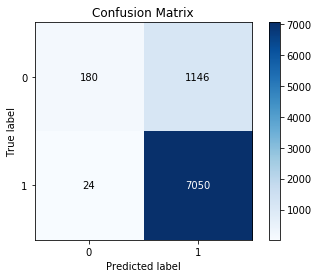

In [41]:
skplt.plot_confusion_matrix(y_test ,predicted)

In [42]:
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, predicted)*100))
print("Precision on test set: %0.3f"%(precision_score(y_test, predicted)))
print("Recall on test set: %0.3f"%(recall_score(y_test, predicted)))
print("F1-Score on test set: %0.3f"%(f1_score(y_test, predicted)))

Accuracy on test set: 86.071%
Precision on test set: 0.860
Recall on test set: 0.997
F1-Score on test set: 0.923


TF-IDF Avg w2v

In [43]:
tf_idf_w2v = TfidfVectorizer()
tfidf_model = tf_idf_w2v.fit(final_string_for_tfidf_train)
final_tfidf_w=tfidf_model.transform(final_string_for_tfidf)

In [44]:
tfidf_feat = tf_idf_w2v.get_feature_names()


tfidf_sent_vectors = [];
row=0;
for sent in list_of_sent:  
    sent_vec = np.zeros(50) 
    weight_sum =0;
    for word in sent:
        try:
            vec = w2v_model.wv[word]
            tf_idf = final_tfidf_w[row, tfidf_feat.index(word)]
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
        except Exception as e: 
            pass #print(e)
            
    try:
        sent_vec /= weight_sum
    except:
        print(e)
        
    tfidf_sent_vectors.append(sent_vec)
    row += 1

In [45]:
X_train = tfidf_sent_vectors[:math.ceil(len(sampled_data)*.7)]  #final_w2v_count
X_test = tfidf_sent_vectors[math.ceil(len(sampled_data)*.3):] #final_w2v_count

In [46]:
X_train=np.nan_to_num(X_train)
X_test=np.nan_to_num(X_test)

In [47]:
normalised_tfidf_train = StandardScaler(with_mean=False).fit_transform(X_train)
normalised_tfidf_test = StandardScaler(with_mean=False).fit_transform(X_test)

In [48]:
paramgrid = {'gamma':[1,0.1,0.01,0.001,0.0001],
             'C':[1,0.1,0.01,0.001,0.0001]}

grid = GridSearchCV(estimator = svc,param_grid=paramgrid ,cv = 4,n_jobs = 3)
grid.fit(normalised_tfidf_train, y_train)
optimal_alpha = grid.best_params_
print("best alpha = ", optimal_alpha)

best alpha =  {'C': 1, 'gamma': 1}


In [49]:
classifier = SVC(C=optimal_alpha.get('C'),gamma=optimal_alpha.get('gamma'),kernel='rbf')
classifier.fit(normalised_tfidf_train,y_train)
predicted = classifier.predict(normalised_tfidf_test)

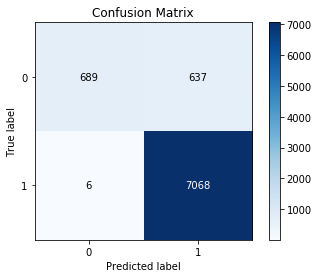

In [50]:
skplt.plot_confusion_matrix(y_test ,predicted)

In [51]:
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, predicted)*100))
print("Precision on test set: %0.3f"%(precision_score(y_test, predicted)))
print("Recall on test set: %0.3f"%(recall_score(y_test, predicted)))
print("F1-Score on test set: %0.3f"%(f1_score(y_test, predicted)))

Accuracy on test set: 92.345%
Precision on test set: 0.917
Recall on test set: 0.999
F1-Score on test set: 0.956


In [52]:
rand = RandomizedSearchCV(estimator = svc,param_distributions=paramgrid ,cv = 4,n_jobs = 3)
rand.fit(normalised_tfidf_train, y_train)
optimal_alpha = rand.best_params_
print("best alpha = ", optimal_alpha)

best alpha =  {'gamma': 1, 'C': 1}


In [53]:
classifier = SVC(C=optimal_alpha.get('C'),gamma=optimal_alpha.get('gamma'),kernel='rbf')
classifier.fit(normalised_tfidf_train,y_train)
predicted = classifier.predict(normalised_tfidf_test)

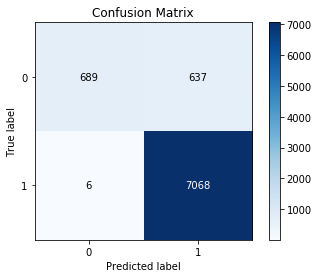

In [54]:
skplt.plot_confusion_matrix(y_test ,predicted)

In [55]:
print("Accuracy on test set: %0.3f%%"%(accuracy_score(y_test, predicted)*100))
print("Precision on test set: %0.3f"%(precision_score(y_test, predicted)))
print("Recall on test set: %0.3f"%(recall_score(y_test, predicted)))
print("F1-Score on test set: %0.3f"%(f1_score(y_test, predicted)))

Accuracy on test set: 92.345%
Precision on test set: 0.917
Recall on test set: 0.999
F1-Score on test set: 0.956
